<a href="https://colab.research.google.com/github/barauna-lo/phd_thesis/blob/main/tese_charts_Cap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ordpy


In [3]:
pip install git+https://github.com/rsautter/eta/

  Cloning https://github.com/rsautter/eta/ to /tmp/pip-req-build-y83vd81o
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/eta/ /tmp/pip-req-build-y83vd81o
  Resolved https://github.com/rsautter/eta/ to commit 81333087bbf2fc5427b4152e20e4f444d7bc2764
  Preparing metadata (setup.py) ... done
  Created wheel for Eta: filename=Eta-0.1-py3-none-any.whl size=15117 sha256=a8bfd6d0cde77811b849583048b44135cc46ba42d362282cd2b1045570290e8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vd_3rv20/wheels/be/e5/6a/f34013f615a3379f8419799e352c823927e6d8decfebf50307
Successfully built Eta


In [4]:
import ordpy
import eta

# Funcions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from itertools import permutations
from collections import Counter

# Function to generate colored noise with a given beta exponent
def colored_noise(beta, size):
    # Generate white noise
    white_noise = np.random.randn(size)

    # Apply Fourier transform to get frequency components
    f_transform = fft(white_noise)

    # Get frequencies corresponding to the Fourier transform
    frequencies = fftfreq(size)

    # Modify the amplitude of each frequency component
    amplitudes = np.abs(frequencies)
    amplitudes[amplitudes == 0] = 1  # Avoid division by zero
    modified_amplitudes = amplitudes ** (-beta / 2.0)

    # Apply the modified amplitudes to the frequency components
    f_transform *= modified_amplitudes

    # Perform the inverse Fourier transform to get the time series
    colored_noise = np.fft.ifft(f_transform).real

    return colored_noise

# Histogram Probability
def plot_histogram_probability(ax, data, bins=30,color='C0'):
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], alpha=0.7, label='Histogram Probability',color=color)
    ax.set_title('Histogram Probability')
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability')
    # ax.legend()

# Spectral Probability
def plot_spectral_probability(ax, data,is_loglog=False,color='C0'):
    f_transform = fft(data)
    power_spectrum = np.abs(f_transform) ** 2
    frequencies = fftfreq(len(data))

    # Only use positive frequencies
    positive_frequencies = frequencies > 0
    frequencies = frequencies[positive_frequencies]
    power_spectrum = power_spectrum[positive_frequencies]

    # Normalize power spectrum
    spectral_probabilities = power_spectrum / np.sum(power_spectrum)

    if is_loglog == True:
        ax.loglog(frequencies, spectral_probabilities, label='Spectral Probability',color=color)
    else:
        ax.plot(frequencies, spectral_probabilities, label='Spectral Probability',color=color)
    ax.set_title('Spectral Probability')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Probability')
    # ax.legend()



def plot_permutation_probability(ax, time_series, emb_dim=3, color='C0'):
    # Create permutations of embedding dimension
    perms = list(permutations(range(emb_dim)))
    perm_count = {perm: 0 for perm in perms}

    # Embed the time series
    embedded = np.array([time_series[i:i + emb_dim] for i in range(len(time_series) - emb_dim + 1)])

    # Find the permutation for each embedded vector
    for emb in embedded:
        perm = tuple(np.argsort(emb))
        perm_count[perm] += 1

    # Calculate probabilities
    total_count = sum(perm_count.values())
    perm_prob = {perm: count / total_count for perm, count in perm_count.items()}

    # Plot the permutation probabilities
    labels, values = zip(*perm_prob.items())
    ax.bar(range(len(labels)), values, tick_label=[str(label) for label in labels],color=color)
    ax.set_xticklabels([str(label) for label in labels], rotation=45)
    ax.set_title('Permutation Probability ($d= ${})'.format(emb_dim))
    ax.set_xlabel('Permutation')
    ax.set_ylabel('Probability')




In [6]:
def plot_probilities_distributions(time_series,color,
                                   histogramns_bins=30,
                                   is_loglog = False, save_path=None):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), gridspec_kw={'height_ratios': [2, 2]})

    # Merge the first two subplots
    axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)

    # Plot time series again to the merged subplot
    axes[0, 0].plot(time_series, label='Time Series',color = color)
    axes[0, 0].set_title('Time Series')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Amplitude')
    axes[0, 0].legend()

    # Plot histogram probability
    plot_histogram_probability(axes[1, 0], time_series,bins=histogramns_bins,color=color)

    # Plot spectral probability
    plot_spectral_probability(axes[1, 1], time_series,is_loglog=is_loglog,color=color)

    # Plot permutation probability
    plot_permutation_probability(plt.subplot(236), time_series, emb_dim=3,color=color)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Results

## Sinuidal

<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


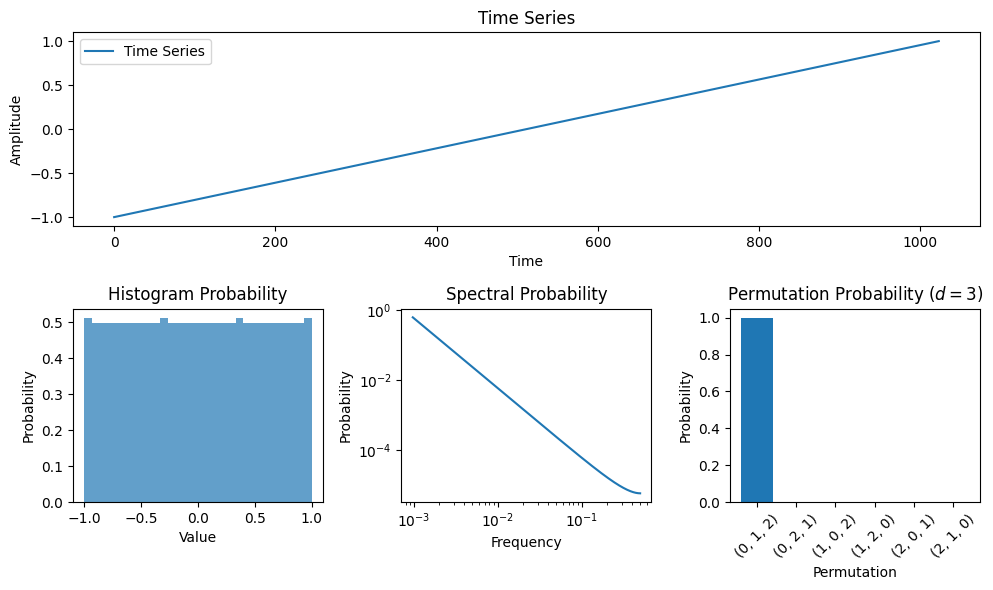

In [9]:
#Generate a sinuisoidal signal
t = np.linspace(-1, 1, 1024)
color = 'C0'
plot_probilities_distributions(t,color,is_loglog=True)

<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)
<ipython-input-5-adf5e38500da>:53: RuntimeWarning: invalid value encountered in divide
  spectral_probabilities = power_spectrum / np.sum(power_spectrum)


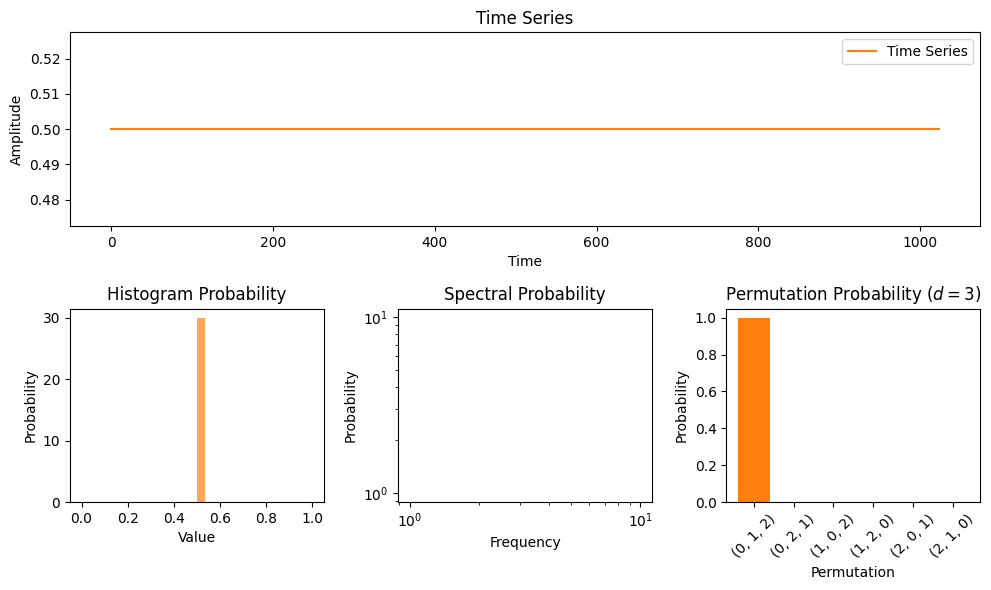

In [10]:
#Generate a sinuisoidal signal
cte = np.linspace(0.5, 0.5, 1024)
color = 'C1'
plot_probilities_distributions(cte,color,is_loglog=True)

<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


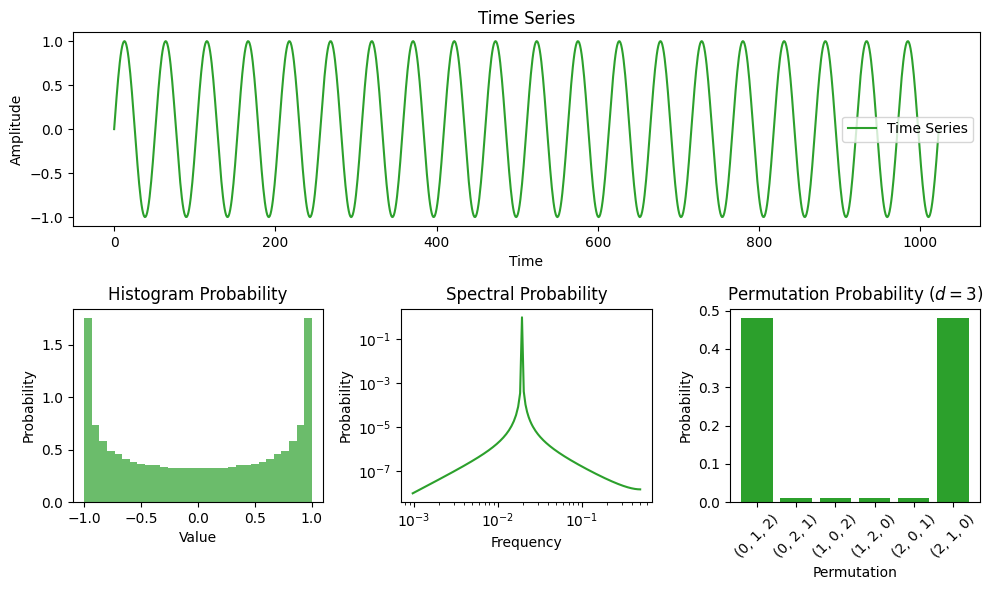

In [11]:
#Generate a sinuisoidal signal
t = np.linspace(-1, 1, 1024)
f = 10
A = 1
sinusoidal_signal = A * np.sin(2 * np.pi * f * t)
color = 'C2'
plot_probilities_distributions(sinusoidal_signal,color,is_loglog=True)

<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


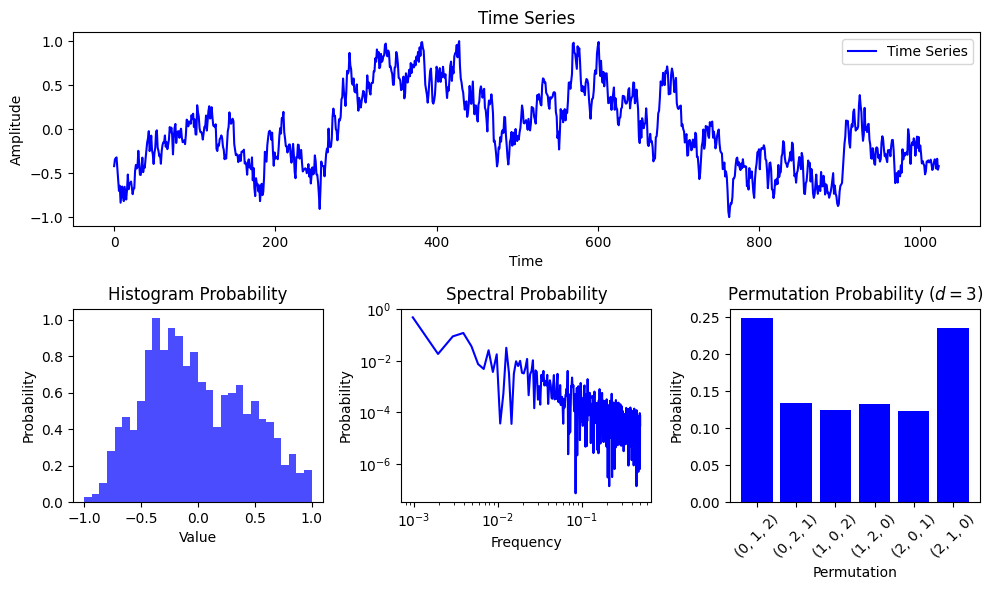

In [12]:
#Generate a sinuisoidal signal

color = 'blue'
beta = 5/3
size = 1024
turbulence_like_noise = colored_noise(beta, size)
turbulence_like_noise = 2 * (turbulence_like_noise - np.min(turbulence_like_noise)) / (np.max(turbulence_like_noise) - np.min(turbulence_like_noise)) - 1
plot_probilities_distributions(turbulence_like_noise,color,is_loglog=True)

<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


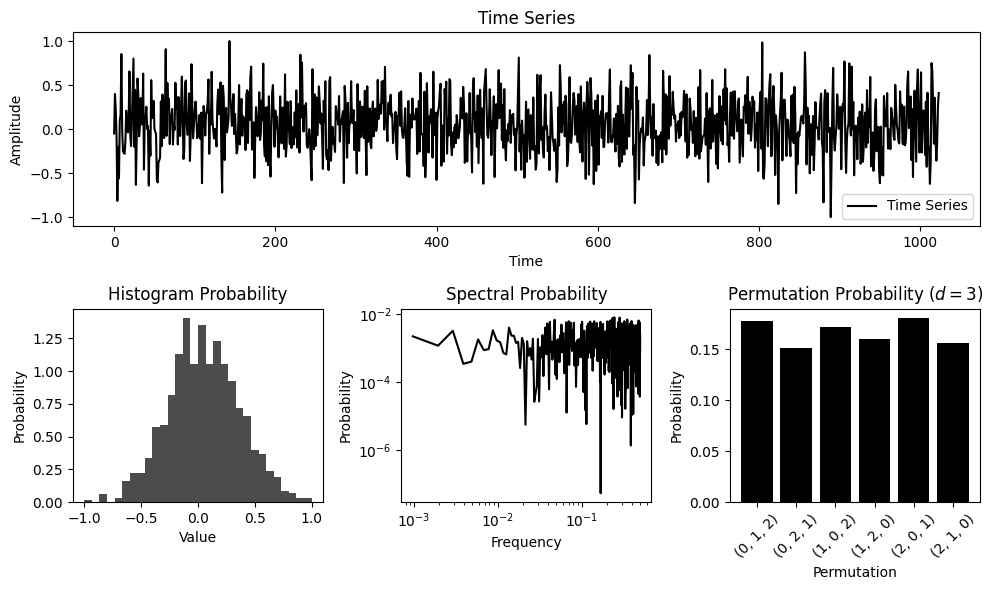

In [13]:
# Parameters
color = 'black'
beta = 0
size = 1024
# Generate the time series
white_noise = colored_noise(beta, size)
white_noise = 2 * (white_noise - np.min(white_noise)) / (np.max(white_noise) - np.min(white_noise)) - 1
plot_probilities_distributions(white_noise,color,is_loglog=True)


<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


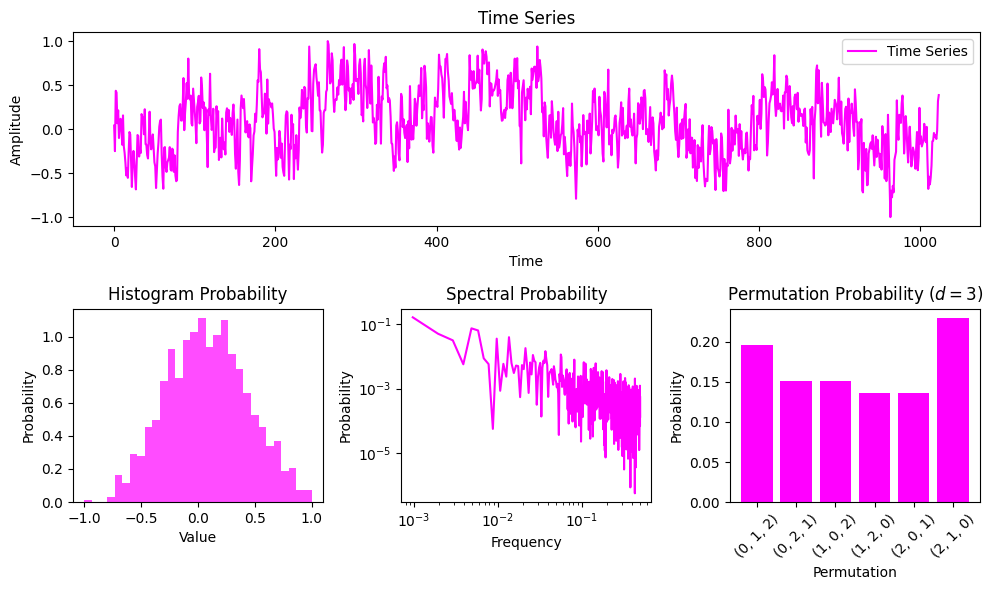

In [14]:
# Parameters
color = 'magenta'
beta = 1
size = 1024
# Generate the time series
pink_noise = colored_noise(beta, size)
pink_noise = 2 * (pink_noise - np.min(pink_noise)) / (np.max(pink_noise) - np.min(pink_noise)) - 1
plot_probilities_distributions(pink_noise,color,is_loglog=True)

<ipython-input-6-13233e7da8de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes[0, 0] = plt.subplot2grid((2, 3), (0, 0), colspan=3)


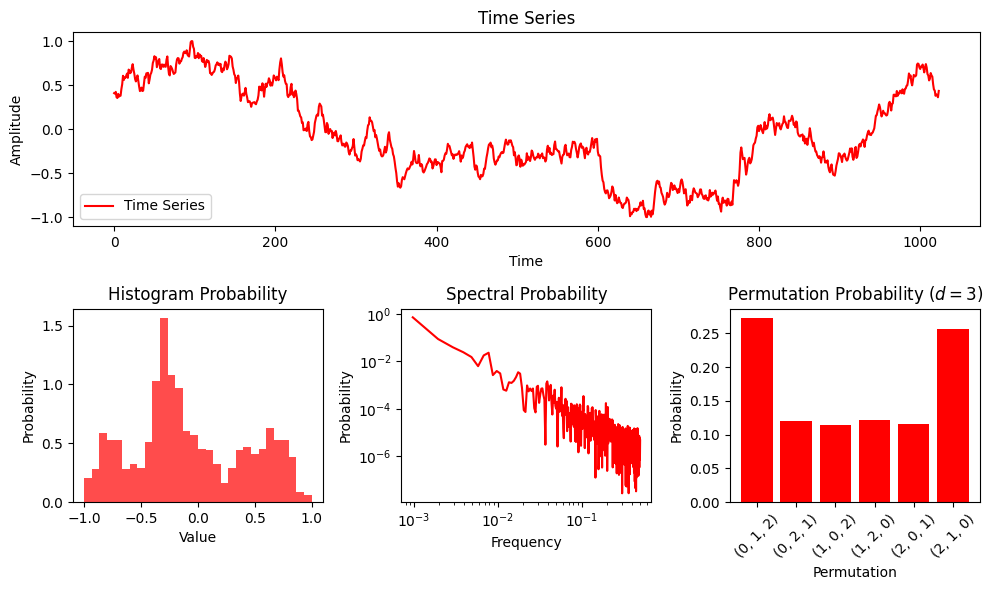

In [15]:
# Parameters
color = 'red'
beta = 2
size = 1024
# Generate the time series
red_noise = colored_noise(beta, size)
red_noise = 2 * (red_noise - np.min(red_noise)) / (np.max(red_noise) - np.min(red_noise)) - 1
plot_probilities_distributions(red_noise,color,is_loglog=True)

In [16]:
print('Linear')
eta.entropy(t)

Linear


/usr/local/lib/python3.10/dist-packages/eta/entropicForm.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return -np.sum(p2*np.log(p2))/np.log(len(p))
/usr/local/lib/python3.10/dist-packages/eta/entropicForm.py:35: RuntimeWarning: divide by zero encountered in log
  alpha,  _ = np.polyfit(np.log(qsi),np.log(ts),deg=1)


{'Histogram_Shannon': 0.9999607651818391,
 'Permutation_Shannon': nan,
 'Spectral_Shannon': 0.3354142881091088,
 'Histogram_PowerlawTsallis': -1.7346558863910513,
 'Permutation_PowerlawTsallis': nan,
 'Spectral_PowerlawTsallis': -1.33744798172816}

In [17]:
print('Sinusoidal')
eta.entropy(sinusoidal_signal)

Sinusoidal


{'Histogram_Shannon': 0.9560108736150699,
 'Permutation_Shannon': 0.49419143201860477,
 'Spectral_Shannon': 0.10181557456548099,
 'Histogram_PowerlawTsallis': -1.7113347389255131,
 'Permutation_PowerlawTsallis': -0.8204033445320765,
 'Spectral_PowerlawTsallis': -0.7136841220049309}

In [18]:
print('white_noise')
eta.entropy(white_noise)

white_noise


{'Histogram_Shannon': 0.8941547785208425,
 'Permutation_Shannon': 0.9987717943587141,
 'Spectral_Shannon': 0.9480301696453555,
 'Histogram_PowerlawTsallis': -1.6879566306229274,
 'Permutation_PowerlawTsallis': -1.273414343468582,
 'Spectral_PowerlawTsallis': -1.847268686670339}

In [19]:
print('pink_noise')
eta.entropy(pink_noise)

pink_noise


{'Histogram_Shannon': 0.9191327248035082,
 'Permutation_Shannon': 0.9884863993427351,
 'Spectral_Shannon': 0.7396217475693402,
 'Histogram_PowerlawTsallis': -1.699775335788997,
 'Permutation_PowerlawTsallis': -1.265554534964066,
 'Spectral_PowerlawTsallis': -1.7430270728028874}

In [20]:
print('Turbulence_noise')
eta.entropy(turbulence_like_noise)

Turbulence_noise


{'Histogram_Shannon': 0.9558144675906094,
 'Permutation_Shannon': 0.9722517256950354,
 'Spectral_Shannon': 0.4538323674173342,
 'Histogram_PowerlawTsallis': -1.7156721590581836,
 'Permutation_PowerlawTsallis': -1.2530331629576916,
 'Spectral_PowerlawTsallis': -1.4934070763558558}

In [21]:
print('red_noise')
eta.entropy(red_noise)

red_noise


{'Histogram_Shannon': 0.9509750111916044,
 'Permutation_Shannon': 0.954593712608483,
 'Spectral_Shannon': 0.2838015590741699,
 'Histogram_PowerlawTsallis': -1.7124404832979305,
 'Permutation_PowerlawTsallis': -1.2392714747741462,
 'Spectral_PowerlawTsallis': -1.227196468335602}